## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [86]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
student_df = pd.read_csv("students-data.csv", sep=';')

In [3]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
student_df.rename_axis('number',axis='index').head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
student_df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
print('No Missing values are there')

No Missing values are there


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
student_df.select_dtypes(exclude = 'int64')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
9,GP,M,U,GT3,T,other,other,home,mother,no,yes,yes,yes,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [11]:
student_df.drop(student_df.var()[student_df.var()<1].index.values,axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,no,yes,yes,no,yes,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [12]:
categorical_feature_mask = student_df.dtypes==object
categorical_cols = student_df.columns[categorical_feature_mask].tolist()

In [13]:
le = LabelEncoder()

In [14]:
student_df[categorical_cols] = student_df[categorical_cols].apply(lambda col: le.fit_transform(col))


In [15]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
student_df['G1'] = pd.cut(student_df.G1,bins=[student_df['G1'].min()-1,9,student_df['G1'].max()+1],labels=["0","1"]).astype(float)


In [17]:
student_df['G2'] = pd.cut(student_df.G2,bins=[student_df['G2'].min()-1,9,student_df['G2'].max()+1],labels=["0","1"]).astype(float)

In [18]:
student_df['G3'] = pd.cut(student_df.G3,bins=[student_df['G3'].min()-1,9,student_df['G3'].max()+1],labels=["0","1"]).astype(float)

In [19]:
student_df.dtypes

school          int32
sex             int32
age             int64
address         int32
famsize         int32
Pstatus         int32
Medu            int64
Fedu            int64
Mjob            int32
Fjob            int32
reason          int32
guardian        int32
traveltime      int64
studytime       int64
failures        int64
schoolsup       int32
famsup          int32
paid            int32
activities      int32
nursery         int32
higher          int32
internet        int32
romantic        int32
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1            float64
G2            float64
G3            float64
dtype: object

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [22]:
X = student_df.drop('G3',axis=1)
y = student_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

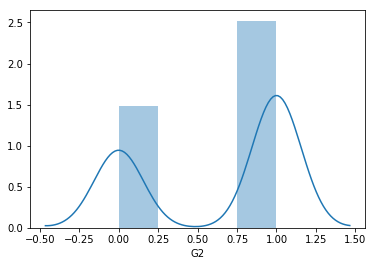

In [23]:
sns.distplot(student_df['G2'])

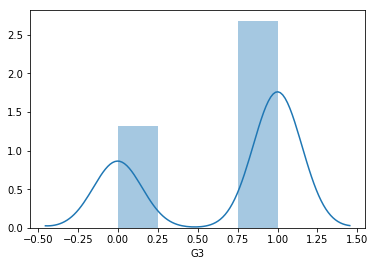

In [24]:
sns.distplot(student_df['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [25]:
num_student = student_df.groupby('school').count()

In [26]:
x1 = num_student['sex'].loc[0]
x2 = num_student['sex'].loc[1]

([<matplotlib.patches.Wedge at 0x9a2a080>,
 [Text(0.5339281832867641, -0.9617279735414249, 'GP'),
  Text(-0.5339282508193672, 0.9617279360489489, 'MS')],
 [Text(0.2912335545200531, -0.524578894658959, '88.4%'),
  Text(-0.29123359135601845, 0.5245788742085176, '11.6%')])

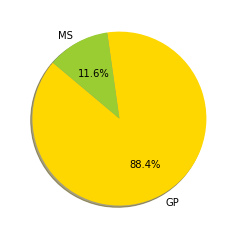

In [27]:
sizes = [x1,x2]
labels = ['GP','MS']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140) 

In [28]:
age_student = student_df.groupby('age').count()
age_student

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
16,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
17,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
18,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
19,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
20,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [29]:
x3 = age_student['school'].loc[15]
x4 = age_student['school'].loc[16]
x5 = age_student['school'].loc[17]
x6 = age_student['school'].loc[18]
x7 = age_student['school'].loc[19]
x8 = age_student['school'].loc[20]
x9 = age_student['school'].loc[21]
x10 = age_student['school'].loc[22]


([<matplotlib.patches.Wedge at 0x9a6b748>,
 [Text(-1.0988387818425955, 0.05053050087502659, '15'),
  Text(-0.15068348496536263, -1.089630436138186, '16'),
  Text(1.094324490728214, -0.11159708326132645, '17'),
  Text(0.26233959437080023, 1.0682593024286586, '18'),
  Text(-0.6231469830169621, 0.9064699871241508, '19'),
  Text(-0.8019985496867723, 0.752860097428675, '20'),
  Text(-0.8255398775740943, 0.7269689887023719, '21'),
  Text(-0.8369986996165608, 0.7137458769339312, '22')],
 [Text(-0.5993666082777793, 0.027562091386378138, '20.8%'),
  Text(-0.0821909917992887, -0.5943438742571924, '26.3%'),
  Text(0.5969042676699349, -0.06087113632435987, '24.8%'),
  Text(0.14309432420225465, 0.5826868922338136, '20.8%'),
  Text(-0.3398983543728884, 0.4944381747949913, '6.1%'),
  Text(-0.43745375437460304, 0.4106509622338227, '0.8%'),
  Text(-0.45029447867677863, 0.39652853929220283, '0.3%'),
  Text(-0.45654474524539673, 0.3893159328730533, '0.3%')])

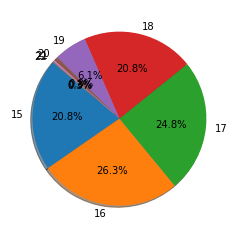

In [30]:
sizes = [x3,x4,x5,x6,x7,x8,x9,x10]
labels = ['15','16','17','18','19','20','21','22']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140) 

In [31]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0.0,0.0,0.0
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0.0,0.0,0.0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,0.0,0.0,1.0
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1.0,1.0,1.0
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0.0,1.0,1.0
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,1.0,1.0,1.0
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,1.0,1.0,1.0
7,0,0,17,1,0,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,0.0,0.0,0.0
8,0,1,15,1,1,0,3,2,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,1.0,1.0,1.0
9,0,1,15,1,0,1,3,4,2,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,1.0,1.0,1.0


## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24)

In [33]:
X_train.count()

school        300
sex           300
age           300
address       300
famsize       300
Pstatus       300
Medu          300
Fedu          300
Mjob          300
Fjob          300
reason        300
guardian      300
traveltime    300
studytime     300
failures      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
famrel        300
freetime      300
goout         300
Dalc          300
Walc          300
health        300
absences      300
G1            300
G2            300
dtype: int64

In [34]:
X_test.count()

school        95
sex           95
age           95
address       95
famsize       95
Pstatus       95
Medu          95
Fedu          95
Mjob          95
Fjob          95
reason        95
guardian      95
traveltime    95
studytime     95
failures      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
famrel        95
freetime      95
goout         95
Dalc          95
Walc          95
health        95
absences      95
G1            95
G2            95
dtype: int64

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [35]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train, y_train)
Predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        35
         1.0       0.88      0.88      0.88        60

   micro avg       0.85      0.85      0.85        95
   macro avg       0.84      0.84      0.84        95
weighted avg       0.85      0.85      0.85        95



# Naive bayes with Iris data

### Import Iris.csv

In [93]:
iris_df = pd.read_csv("Iris.csv")

In [98]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [97]:
iris_df.dropna(inplace=True)

In [40]:
iris_df['SepalLengthCm'].mean()

5.843708609271524

In [41]:
iris_df['SepalLengthCm'].fillna(iris_df['SepalLengthCm'].mean(),inplace=True)
iris_df['SepalWidthCm'].fillna(iris_df['SepalWidthCm'].mean(),inplace=True)
iris_df['PetalLengthCm'].fillna(iris_df['PetalLengthCm'].mean(),inplace=True)
iris_df['PetalWidthCm'].fillna(iris_df['PetalWidthCm'].mean(),inplace=True)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [99]:
X = iris_df.drop('Species',axis=1)
y = iris_df['Species']

### Find the distribution of target variable (Class)

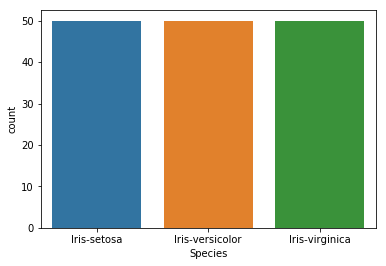

In [100]:
sns.countplot(x=y)

### Plot the distribution of target variable using histogram

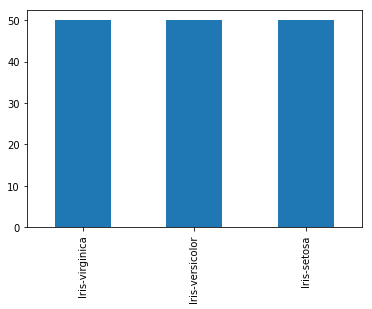

In [101]:
pd.value_counts(iris_df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

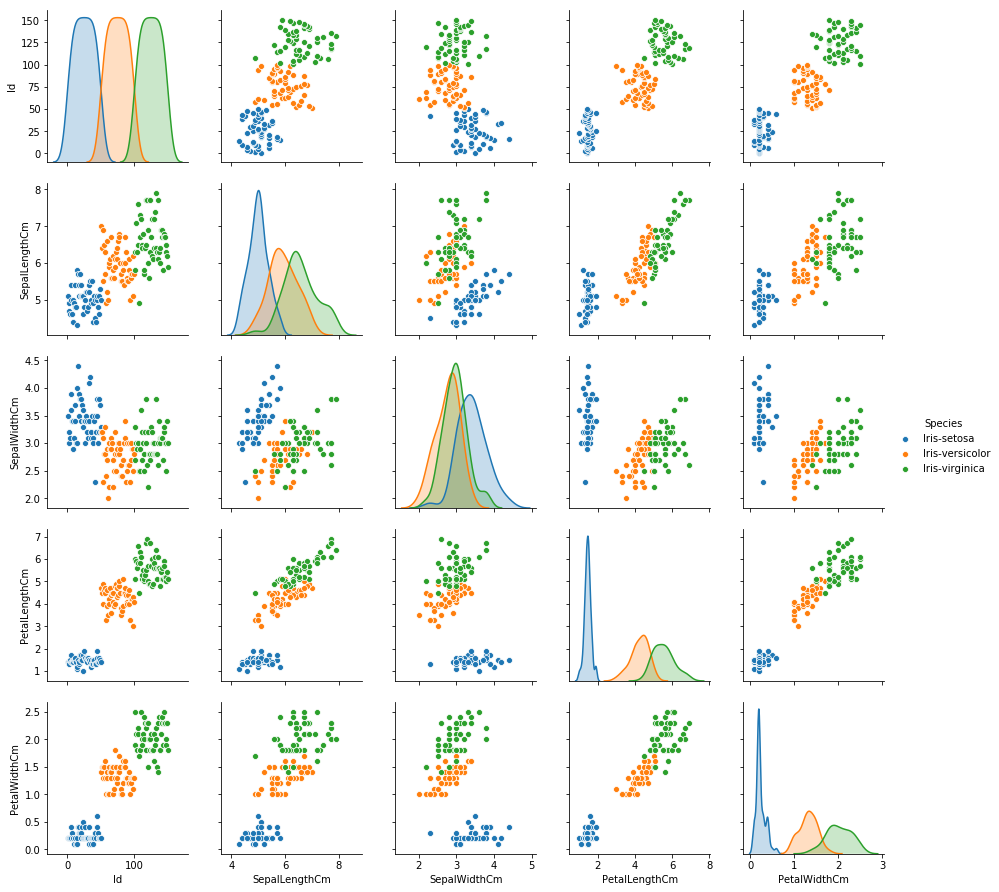

In [103]:
sns.pairplot(iris_df,hue='Species')

In [104]:
print('every column is distributed normaly along axis. Id and sepal length have linear proportionate relation. Similarly Id and petal length and petal width also have linear proportionate relationship')
print('petal Width and sepal Width does have any correlation')

every column is distributed normaly along axis. Id and sepal length have linear proportionate relation. Similarly Id and petal length and petal width also have linear proportionate relationship
petal Width and sepal Width does have any correlation


### Summary Statistics and explain insights for at least 2 variables

In [105]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [106]:
print('1. Id column is normally distribute along the axis')
print('2. sepal Width is skewed to the right')


1. Id column is normally distribute along the axis
2. sepal Width is skewed to the right


### Correlation among all variables and give your insights

In [107]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [108]:
print('1. petalLength and id column have very good correlation')
print('2. petalpetalWidth and id column have very good correlation')
print('3. SepalWidth and SepalLength have negative correlation')

1. petalLength and id column have very good correlation
2. petalpetalWidth and id column have very good correlation
3. SepalWidth and SepalLength have negative correlation


### Split data in Training and Validation in 80:20

In [113]:
X = iris_df.drop('Species',axis=1)
y = iris_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

### Do Feature Scaling

In [114]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(X_train)

### Train and Fit NaiveBayes Model

In [119]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [121]:
from sklearn import metrics
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))



Test Accuracy: 1.0


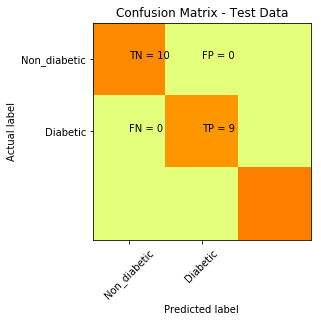

In [117]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [122]:
print('From the confusion matrix it seems that the model is giving 100% accuracy')

From the confusion matrix it seems that the model is giving 100% accuracy
